In [1]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [21]:
def eulerstep(A, uold, h):
    unew = uold + h * A @ np.transpose(uold)
    return unew

def eulerint(A, y0, t0, tf, N):
    h = (tf - t0) / N
    tgrid = np.linspace(t0, tf, N)
    y = np.zeros((N, len(y0)))
    y[0, :] = y0
    for n in range(N - 1):
        y[n + 1, :] = eulerstep(A, y[n, :], h)
    err = np.zeros_like(y)
    for n in range(N):
        err[n, :] = abs(np.transpose(y[n, :]) - la.expm(A * tgrid[n]) @ np.transpose(y0))
    return tgrid, y, err

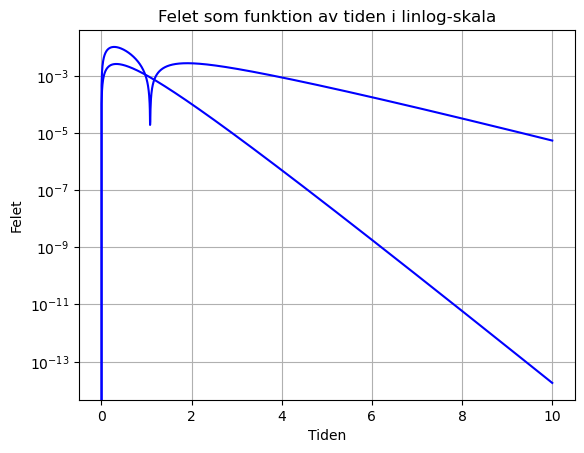

In [26]:
y0 = np.array([1, 1])
A = np.array([[-1, 10], [0, -3]])

tgrid, approx, err = eulerint(A, y0, 0, 10, 2000)

# plt.plot(tgrid, approx, 'b')
# true = np.zeros_like(approx)
# for n in range(len(tgrid)):
#    true[n, :] = la.expm(tgrid[n] * A) @ np.transpose(y0)
# plt.plot(tgrid, true, 'r')
plt.grid()
plt.ylabel("Felet")
plt.xlabel("Tiden")
plt.title("Felet som funktion av tiden i linlog-skala")
plt.semilogy(tgrid, err, 'b')

In [23]:
def errVSh(A, y0, t0, tf):
    #Nvec = np.linspace(1, 10, 10)
    Nvec = [int(np.power(2,i)) for i in range(1, 10)]
    err = np.zeros((len(Nvec), len(y0)))
    for i in range(len(Nvec)):
        tgrid, approx, mat = eulerint(A, y0, t0, tf, Nvec[i])
        err[i,:] = mat[-1,:]

    h=np.zeros(len(Nvec))
    for i in range(len(Nvec)):
        h[i] = (tf - t0) /Nvec[i]
    plt.grid()
    plt.xlabel("Steglängden h")
    plt.ylabel("Felet på uppskattningen")
    plt.title("Felet som funktion av steglängden i loglog-skala")
    plt.loglog(h, err, 'r')

0


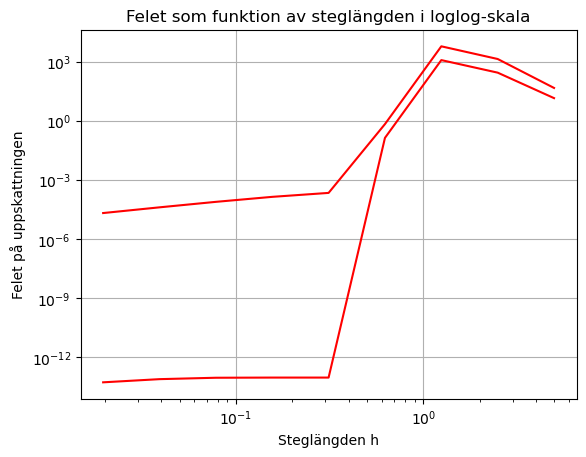

In [24]:
y0 = [1,1]
A = np.array([[-1, 10], [0, -3]])
print(A[1,0])
errVSh(A, y0, 0, 10)
